In [44]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from typing import Callable  #pour annoter le type function

# Partie I Tri et bases de données

In [46]:
def tri(L:[int])->None:
    """Tri par insertion d'une liste L"""
    n = len(L)
    for i in range(1, n):
        j = i
        x = L[i]
        while 0 < j and x < L[j-1]:
            L[j] = L[j-1]
            j = j-1            
        L[j] = x 

In [47]:
#Tests unitaires
for L in [[], [5, 2, 3, 1, 4], list(range(6)), list(range(5, -1, -1))]:
    tri(L)
    assert L == sorted(L)
print("Test unitaires réussis")

Test unitaires réussis


## Q1

In [17]:
# Question 1
# faire un tableau d'états

def tri(L, debug = False):
    """Tri par insertion d'une liste L"""
    n = len(L)
    if debug:
        print("|{:^10}|{:^10}|{:^10}|{:^40}|".format("i","j","x", "L"))
    for i in range(1, n):
        j = i
        x = L[i]
        if debug:
            print("|{:^10d}|{:^10d}|{:^10d}|{:^40s}|".format(i,j,x, str(L)))
        while 0 < j and x < L[j-1]:
            L[j] = L[j-1]
            j = j-1      
            if debug:
                print("|{:^10d}|{:^10d}|{:^10d}|{:^40}|".format(i,j,x, str(L)))      
        L[j] = x 
        if debug:
                print("|{:^10d}|{:^10d}|{:^10d}|{:^40}|".format(i,j,x, str(L)))


L = [5, 2, 3, 1, 4]
tri(L, debug = True)

|    i     |    j     |    x     |                   L                    |
|    1     |    1     |    2     |            [5, 2, 3, 1, 4]             |
|    1     |    0     |    2     |            [5, 5, 3, 1, 4]             |
|    1     |    0     |    2     |            [2, 5, 3, 1, 4]             |
|    2     |    2     |    3     |            [2, 5, 3, 1, 4]             |
|    2     |    1     |    3     |            [2, 5, 5, 1, 4]             |
|    2     |    1     |    3     |            [2, 3, 5, 1, 4]             |
|    3     |    3     |    1     |            [2, 3, 5, 1, 4]             |
|    3     |    2     |    1     |            [2, 3, 5, 5, 4]             |
|    3     |    1     |    1     |            [2, 3, 3, 5, 4]             |
|    3     |    0     |    1     |            [2, 2, 3, 5, 4]             |
|    3     |    0     |    1     |            [1, 2, 3, 5, 4]             |
|    4     |    4     |    4     |            [1, 2, 3, 5, 4]             |
|    4     |

# Q2


**On démontre d'abord la terminaison de la fonction `tri` sur n'importe quelle entrée :**


La boucle externe de la fonction `tri`  est une boucle inconditionnelle et pour chaque itération de la boucle externe on a une boucle interne conditionnelle avec un entier positif `j` qui est un  __variant de boucle__ car il décroît strictement à chaque itération. Par conséquent chaque itération de la boucle externe se termine et la boucle externe se termine car c'est une boucle inconditionnelle.  **Ceci prouve la terminaison de la fonction `tri` sur n'importe quelle entrée.**



**On démontre  ensuite  la correction de la fonction `tri` sur  n'importe quelle entrée :**


Pour la fonction `tri` précédente, on définit   la propriété :

_P(i):= `L[0:i+1]` triée dans l'ordre croissant à l'issue de l'itération `i`_ 

Démontrons que _P(i)_ est un **invariant** de la boucle externe de la fonction `tri`.

* __Initialisation :__ Pour `i=0`,  `L[0:0+1]` est un sous-tableau réduit à un seul élément `L[0]` donc il est nécessairement trié dans l'ordre croissant.
* __Hérédité :__  Supposon que  _P(i)_ soit vraie, `L[0:i+1]` est donc un sous-tableau trié dans l'ordre croissant. Lors de l'itération `i+1`, a boucle conditionnelle interne va insérer l'élément `L[i+1]` à sa place dans le sous-tableau `L[0:i+1]`. A la fin de l'itération `i+1` de la boucle externe, `L[0:i+2]` sera donc un sous-tableau d'éléments de `L` trié dans l'ordre croissant. **Ceci achève la preuve que _P(i)_ est un invariant de boucle.**


La boucle externe se termine à l'issue de l'itération `i := n - 1`, en instanciant l'invariant en sortie de boucle, on obtient que _`L[0:n]` triée dans l'ordre croissant à l'issue de l'itération `i`_  ce qui équivaut à `L` triée dans l'ordre croissant. La postcondition fixée dans la spécification de la fonction `tri` est vérifiée et la fonction `tri` est donc correcte sur  n'importe quelle entrée. **Ceci prouve la correction de la fonction `tri` sur n'importe quelle entrée.**


# Q3

Le tri par insertion est de complexité linéaire dans le meilleur des cas (liste déjà classée) et quadratique dans le pire des cas (liste classée dans l'ordre inverse) :

* __Cas le plus favorable :__ si la liste est déjà triée dans l'ordre croissant, la boucle interne n'est jamais exécutée car la condition pour la première itération, `x < L[j-1]`  pour `x = L[i]` et `j = i`,  n'est pas vérifiée. Les $n-1$ tours de la boucle conditionnelle externe sont exécutés ce qui fait une __complexité linéaire__. C'est le meilleur des cas car on ne peut avoir moins d'itérations de la boucle externe.
* si la liste est déjà triée dans l'ordre décroissant,  lorsque l'index de la boucle externe vaut `i`, la valeur `L[i]` doit être insérée en première position dans le sous-tableau déjà trié `L[0:i]` et donc elle est comparée et échangée successivement avec les `i` valeurs d'index compris entre `0` et `i-1` inclus. Lorsque la boucle externe se termine, on aura donc $\sum_{i=1}^{n-1}i=\frac{(n-1)n}{2}$ exécutions de  la boucle interne. Cela fait une __complexité quadratique__ en $O(n^{2})$. On ne peut pas avoir de cas plus défavorable car au pire l'élément  d'index `i` à insérer est comparé et échangé avec les `i` précédents déjà triés. 

Le __tri rapide__ a une complexité moyenne linéarithmique d'ordre de grandeur $O(n \ln(n))$ et une complexité quadratique dans le pire des cas.

Le  __tri fusion__ a une complexité linéarithmique d'ordre de grandeur $O(n \ln(n))$ dans tous les cas.

## Q4

In [20]:
def tri_chaine(L):
    for k in range(len(L)):
        L[k][0], L[k][1] = L[k][1], L[k][0]
    tri(L)
    for k in range(len(L)):
        L[k][0], L[k][1] = L[k][1], L[k][0]

In [22]:
# test unitaire
L = [['Bresil', 76], ['Kenya', 26017], ['Ouganda', 8431]]
tri_chaine(L)
assert L == [['Bresil', 76], ['Ouganda', 8431], ['Kenya', 26017]]
print("Test réussi, L = ", L)

Test réussi, L =  [['Bresil', 76], ['Ouganda', 8431], ['Kenya', 26017]]


## Q5

Les valeurs des attributs iso, nom et annee ne sont pas distinctes pour tous les enregistrements de la table palu donc ces attibuts ne peuvent servir de clef primaire.
En revanche les couples (nom, annee) ou (iso, annee) peuvent servir de clef primaire.

## Chargement de l'extension ipython-sql

Voir <https://www.datacamp.com/community/tutorials/sql-interface-within-jupyterlab>

In [1]:
%reload_ext sql
%config SqlMagic.displaycon = False
%config SqlMagic.autolimit = 100

In [2]:
%sql sqlite:///mine-2016.db

In [ ]:
Contenu des tables :

In [9]:
%%sql

SELECT * FROM palu ;

Done.


nom,iso,annee,cas,deces
Bresil,BR,2009,309316,85
Bresil,BR,2010,334667,76
Kenya,KE,2010,898531,26017
Mali,ML,2011,307035,2128
Ouganda,UG,2010,1581160,8431


In [10]:
%%sql

SELECT * FROM demographie ;

Done.


pays,periode,pop
BR,2009,193020000
BR,2010,194946000
KE,2010,40909000
ML,2011,14417000
UG,2010,33987000


## Q6

~~~sql
SELECT * FROM palu 
    WHERE annee = 2010 AND deces >= 1000 ;
~~~

In [8]:
%%sql

SELECT * FROM palu 
    WHERE annee = 2010 AND deces >= 1000 ;


Done.


nom,iso,annee,cas,deces
Kenya,KE,2010,898531,26017
Ouganda,UG,2010,1581160,8431


## Q7

~~~sql
SELECT nom, pays, annee, cas * 1.0/ pop *100000 
    FROM palu JOIN demographie 
        ON iso = pays AND annee = periode
            WHERE periode = 2011 
~~~

In [11]:
%%sql

SELECT nom, pays, annee, cas * 1.0/ pop *100000 
    FROM palu JOIN demographie 
        ON iso = pays AND annee = periode
            WHERE periode = 2011 ;


Done.


nom,pays,annee,cas * 1.0/ pop *100000
Mali,ML,2011,2129.6733023513907


## Q8

~~~sql
SELECT  nom FROM palu 
    WHERE annee = 2010 
        ORDER BY cas ASC LIMIT 1, 1 ;
~~~

In [12]:
%%sql

SELECT  nom FROM palu 
    WHERE annee = 2010 
        ORDER BY cas ASC LIMIT 1, 1 ;

Done.


nom
Kenya


## Q9

Documentation du module sqlite3 sur <https://docs.python.org/3.8/library/sqlite3.html>

In [31]:
import sqlite3                          #module de manipulations de bases sqlite en Python
con = sqlite3.connect('mine-2016.db')  #connexion à la base
cur = con.cursor()                     #création d'un curseur pour interroger la base
requete = '''SELECT nom, deces FROM palu WHERE annee=2010'''
cur.execute(requete)                   #exécution d'une requête sur la base par le biais du curseur
con.commit()                           #enregistrement de la requête
deces2010 = cur.fetchall()             #récupération des résultats de la requête dans deces2010
con.close()                            #fermeture de la connexion
deces2010 = [list(t) for t in deces2010]
print(deces2010)                       #affichage de deces2010

[['Bresil', 76], ['Kenya', 26017], ['Ouganda', 8431]]


In [32]:
tri_chaine(deces2010)
print(deces2010)

[['Bresil', 76], ['Ouganda', 8431], ['Kenya', 26017]]


# Partie II Modèle à compartiments


Voir <https://fr.wikipedia.org/wiki/Mod%C3%A8les_compartimentaux_en_%C3%A9pid%C3%A9miologie>.

Ci-dessous le graphe probabiliste d'un modèle à cinq compartiments.


![SIRD](CompartmentalModel.jpg)

Modèle à quatre compartiments (S,I,R,D)  :

* $S$ : sains ou susceptibles
* $I$ : infectés
* $R$ : rétablis, immunisés
* $D$ : dead, morts


Système différentiel, traduisant la dynamique du modèle :

$\begin{cases}
\frac{d}{dt}S(t)=-rS(t)I(t) \\
\frac{d}{dt}I(t)=rS(t)I(t) -(a+b)I(t) \\
\frac{d}{dt}R(t)=aI(t) \\
\frac{d}{dt}D(t)=bI(t) \\
\end{cases}$


avec :

* $r$ le taux de contagion
* $a$ le taux de guérison
* $b$ le taux de mortalité.


Conditions initiales à l'instant $t=0$ :

* $S(0)=0,95$
* $I(0)=0,05$
* $R(0)=D(0)=0$

## Q10

Le vecteur $X = (S, I, R, D)$ permet de transformer le système différentiel en une équation différentielle vectorialisée :
$\frac{d}{dt}X=f(X)$.



## Q11

In [98]:
import numpy as np
from typing import Callable  #pour annoter le type function

def f(X:[float], r:float, a:float, b:float)->np.ndarray:   
    """Fonction définissant l'équation différentielle dX/dt = f(X)
    Paramètres :
        r, a, b : de type flottant, taux de contagion, guérison, mortalité
        X = (S,I,R,D) de type liste de flottants
    Valeur renvoyée : de type array
    """
    (S, I, R, D) = X
    return np.array([-r*S*I, r*S*I - (a + b)*I, a*I, b*I])

def euler(f:Callable, N:int)->([float],[np.ndarray]):
    # Parametres
    tmax = 25.      #temps maximal
    r = 1.          #taux de contagion
    a = 0.4         #taux de guérison
    b = 0.1         #taux de mortalité
    X0 = np.array([0.95, 0.05, 0., 0.])   #vecteur X=(S,I,R,D)
 
    #initialisation du schéma d'Euler
    dt = tmax/N      #pas de temps du schéma d'Euler    
    t = 0
    X = X0
    tt = [t]
    XX = [X]

    # Schéma  d’Euler
    for i in range(N):
        t = t + dt
        X = X + dt * f(X, r, a, b)
        tt.append(t)
        XX.append(X)
    return tt, XX

In [62]:
#exemple
euler(f,7)

([0,
  3.5714285714285716,
  7.142857142857143,
  10.714285714285715,
  14.285714285714286,
  17.857142857142858,
  21.42857142857143,
  25.000000000000004],
 array([[ 0.95      ,  0.05      ,  0.        ,  0.        ],
        [ 0.78035714,  0.13035714,  0.07142857,  0.01785714],
        [ 0.41705312,  0.26088056,  0.25765306,  0.06441327],
        [ 0.02847794,  0.1835976 ,  0.63033957,  0.15758489],
        [ 0.00980479, -0.12558211,  0.89262185,  0.22315546],
        [ 0.01420232,  0.09427413,  0.71321884,  0.17830471],
        [ 0.00942049, -0.06929071,  0.84789617,  0.21197404],
        [ 0.01175175,  0.05211144,  0.74890945,  0.18722736]]))

Représentation graphique de l'évolution des catégories (S,I,R,D) du modèle à 4 compartiments.

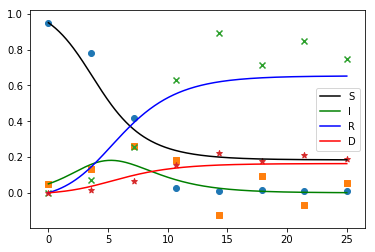

In [65]:
import numpy as np
import matplotlib.pyplot as plt
plt.clf()
N = 7
tt, XX = euler(f, N)
mark = ['o','s','x','*']
for k in range(4):
    plt.scatter(tt, XX[:,k],marker=mark[k])
N = 250
tt, XX = euler(f, N)
color = ['k','g','b','r']
label = ['S','I','R','D']
for k in range(4):
    plt.plot(tt, XX[:,k],color=color[k], label = label[k])
plt.legend(loc='best')
plt.show()

## Q12

Pour N = 250, le pas du schéma d'Euler est plus petit (puisque pas = dt = tmax/N avec tmax = 25 dans les deux cas) donc on obtient une meilleure approximation par la méthode d'Euler au prix d'un temps de calcul plus important.


## Q13

Prise en compte du temps d'incubation $\tau$ :

Le système différentiel s'écrit désormais :

$\begin{cases}
\frac{d}{dt}S(t)=-rS(t)I(t-\tau) \\
\frac{d}{dt}I(t)=rS(t)I(t-\tau) -(a+b)I(t) \\
\frac{d}{dt}R(t)=aI(t) \\
\frac{d}{dt}D(t)=bI(t) \\
\end{cases}$


Conditions initiales, on suppose que pour $t \in [-\tau,0]$ on a :

* $S(t)=0,95$
* $I(t)=0,05$
* $R(t)=D(0)=0$



In [150]:
def f2(X:[float], Itau:float, r:float, a:float, b:float)->np.ndarray:  
    """Fonction définissant l'équation différentielle dX/dt = f(X)
    Paramètres :
        r, a, b : de type flottant, taux de contagion, guérison, mortalité
        Itau est la valeur de I(t - p * dt)
        X = (S,I,R,D) de type liste de flottants
    Valeur renvoyée : de type array
    """
    (S, I, R, D) = X
    return np.array([-r*S*Itau, r*S*Itau - (a + b)*I, a*I, b*I])

def euler2(f:Callable, N:int)->([float],[np.ndarray]):
    # Parametres
    tmax = 25.      #temps maximal
    r = 1.          #taux de contagion
    a = 0.4         #taux de guérison
    b = 0.1         #taux de mortalité
    X0 = np.array([0.95, 0.05, 0., 0.])
   
    #initialisation du schéma d'Euler
    dt = tmax/N      #pas de temps du schéma d'Euler    
    p = 50           #nombre de pas de retard
    t = 0
    X = X0
    tt = [t]
    XX = [X]

    # Schéma d’Euler
    for i in range(N):
        t = t + dt
        #avec décalage (temps >= p = 0)
        if i >= 50:
            Itau = XX[-p][1] 
            X = X +  dt * f2(X, Itau, r, a, b)
        #sans décalage sinon
        else:
            X = X +  dt * f2(X, 0.05, r, a, b)
        tt.append(t)
        XX.append(X)
    return tt, XX

Evolution du modèle avec taux d'incubation pour un pas N croissant

In [149]:
#Exemple 2, 
for N in range(10, 101, 10):
    print(f"N ={N}", f"X=(S,I,R,D)={euler2(f2,N)[1][-1]}")

N =10 X=(S,I,R,D)=[0.2499218  0.02776904 0.57784733 0.14446183]
N =20 X=(S,I,R,D)=[0.26130585 0.02903398 0.56772813 0.14193203]
N =30 X=(S,I,R,D)=[0.26498509 0.02944278 0.5644577  0.14111443]
N =40 X=(S,I,R,D)=[0.26680393 0.02964486 0.56284096 0.14071024]
N =50 X=(S,I,R,D)=[0.2678887  0.02976538 0.56187674 0.14046918]
N =60 X=(S,I,R,D)=[0.24123236 0.04222103 0.57323728 0.14330932]
N =70 X=(S,I,R,D)=[0.22368427 0.03947568 0.58947204 0.14736801]
N =80 X=(S,I,R,D)=[0.21521869 0.03524511 0.59962897 0.14990724]
N =90 X=(S,I,R,D)=[0.21113074 0.03196282 0.60552516 0.15138129]
N =100 X=(S,I,R,D)=[0.20924834 0.02955866 0.60895441 0.1522386 ]


## Q14

Calcul du temps d'incubation par une intégrale à densité.

Le système différentiel s'écrit désormais :

$\begin{cases}
\frac{d}{dt}S(t)=-rS(t)\int_{0}^{\tau}I(t-s)h(s) ds \\
\frac{d}{dt}I(t)=rS(t)\int_{0}^{\tau}I(t-s)h(s) ds -(a+b)I(t) \\
\frac{d}{dt}R(t)=aI(t) \\
\frac{d}{dt}D(t)=bI(t) \\
\end{cases}$


Conditions initiale, on suppose que pour $t \in [-\tau,0]$ on a :

* $S(t)=0,95$
* $I(t)=0,05$
* $R(t)=D(0)=0$


In [162]:
import numpy as np

def h(t, mu, sigma):
    """Fonction de densité de la loi normale centrée réduite d'espérance mu
    et d'écart-type sigma"""
    return 1/(sigma * np.sqrt(2*np.pi))*np.exp(-((t -mu) / sigma)**2/2)


def f2(X:[float], Itau:float, r:float, a:float, b:float)->np.ndarray:  
    """Fonction définissant l'équation différentielle dX/dt = f(X)
    Paramètres :
        r, a, b : de type flottant, taux de contagion, guérison, mortalité
        Itau est la valeur de integrale(0,tau, I(t-s)*h(s))
        X = (S,I,R,D) de type liste de flottants
    Valeur renvoyée : de type array
    """
    (S, I, R, D) = X
    return np.array([-r*S*Itau, r*S*Itau - (a + b)*I, a*I, b*I])


def euler3(f:Callable, N:int)->([float],[np.ndarray]):
    # Parametres
    tmax = 25.      #temps maximal
    r = 1.          #taux de contagion
    a = 0.4         #taux de guérison
    b = 0.1         #taux de mortalité
    X0 = np.array([0.95, 0.05, 0., 0.])
 
    #initialisation du schéma d'Euler
    dt = tmax/N      #pas de temps du schéma d'Euler    
    p = 50           #nombre de pas de retard
    t = 0
    X = X0
    tt = [t]
    XX = [X]
    
    #paramètres de la fonction de densité
    mu = (p * dt) / 2  #espérance (moitié de tau = (p *dt) / 2)
    sigma = (p * dt) / 6 #écart-type (tiers  de esperance / 2)
    # Schéma d’Euler
    for i in range(N):
        t = t + dt
        #décalage si temps >= 50
        if i >= 50:
            #approximation de Integrale(0,tau,I(t-s)*h(s)) par la méthode des rectangles
            Itau = 0
            for j in range(p):
                Itau += XX[-1 - j][1] * h(j*dt, mu, sigma)
            Itau = Itau * dt
            X = X + dt * f2(X, Itau, r, a, b)
        #pas de décalage
        else:
            X = X + dt * f2(X, 0.05, r, a, b)
        tt.append(t)
        XX.append(X)
    return tt, XX

In [163]:
#Exemple 2, 
for N in range(10, 101, 10):
    print(f"N ={N}", f"X=(S,I,R,D)={euler3(f2,N)[1][-1]}")

N =10 X=(S,I,R,D)=[0.2499218  0.02776904 0.57784733 0.14446183]
N =20 X=(S,I,R,D)=[0.26130585 0.02903398 0.56772813 0.14193203]
N =30 X=(S,I,R,D)=[0.26498509 0.02944278 0.5644577  0.14111443]
N =40 X=(S,I,R,D)=[0.26680393 0.02964486 0.56284096 0.14071024]
N =50 X=(S,I,R,D)=[0.2678887  0.02976538 0.56187674 0.14046918]
N =60 X=(S,I,R,D)=[0.26055832 0.03199848 0.56595456 0.14148864]
N =70 X=(S,I,R,D)=[0.25512579 0.03011588 0.57180667 0.14295167]
N =80 X=(S,I,R,D)=[0.24896389 0.02925372 0.57742591 0.14435648]
N =90 X=(S,I,R,D)=[0.24098592 0.02913883 0.5839002  0.14597505]
N =100 X=(S,I,R,D)=[0.23287764 0.02837823 0.5909953  0.14774883]


# Méthodes par automates cellulaires

## Q15

In [164]:
def grille(n) :
    """Prend en paramètre un entier positif n
    Renvoie une liste de  n listes de même taille n remplies de 0"""
    M = []
    for i in range(n) :
        L=[ ]
        for j in range(n): L.append(0)
        M.append(L)
    return M

In [139]:
grille(3)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

## Q16

In [183]:
import random as rd 

def init(n:int)->[[int]]:
    """Initialise une grille de taille n remplie de 0
    avec une cellule choisie aléatoirement qui est infectée (valeur 1)
    """
    g = grille(n)
    x, y = rd.randrange(0, n), rd.randrange(0, n)
    g[y][x] = 1
    return g

## Q17

In [184]:
def compte(G:[[int]])->[int]:
    """Prend en paramètre une grille G
    Renvoie une liste des effectifs de chaque état :
    0 : sain, 1: infecté, 2: rétabli, 3 : décédé"""
    etat = [0 for _ in range(4)]
    n = len(G)
    for y in range(n):
        for x in range(n):
            etat[G[y][x]] += 1
    return etat

## Q18 et Q19

In [185]:
def est_exposee(G:[[int]], i:int, j:int)->True:
    """Retourne un booleen indiquant si une case en ligne i et colonne j
    comporte  au moins une case infectée dans son voisinage """
    n = len(G)
    if i == 0 and j == 0:
        return (G[0][1]-1)*(G[1][1]-1)*(G[1][0]-1) == 0
    elif i == 0 and j == n-1:
        return (G[0][n-2]-1)*(G[1][n-2]-1)*(G[1][n-1]-1) == 0
    elif i == n-1 and j == 0:
        return (G[n-1][1]-1)*(G[n-2][1]-1)*(G[n-2][0]-1) == 0
    elif i == n-1 and j == n-1:
        return (G[n-1][n-2]-1)*(G[n-2][n-2]-1)*(G[n-2][n-1]-1) == 0
    elif i == 0:
        return (G[0][j+1]-1)*(G[0][j-1]-1)*(G[1][j-1]-1)*(G[1][j]-1)*(G[1][j+1]-1)== 0
    elif i == n-1:
        return (G[n-1][j-1]-1)*(G[n-2][j-1]-1)*(G[n-2][j]-1)*(G[n-2][j+1]-1)*(G[n-1][j+1]-1) == 0
    elif j == 0:
        return (G[i-1][0]-1)*(G[i-1][1]-1)*(G[i][1]-1)*(G[i+1][1]-1)*(G[i+1][0]-1) == 0
    elif j == n-1:
        return (G[i-1][n-1]-1)*(G[i-1][n-2]-1)*(G[i][n-2]-1)*(G[i+1][n-2]-1)*(G[i+1][n-1]-1) == 0
    else:
        return (G[i-1][j-1]-1)*(G[i-1][j]-1)*(G[i-1][j+1]-1)*(G[i][j-1]-1)*(G[i][j+1]-1) * (G[i+1][j-1]-1)*(G[i+1][j]-1)*(G[i+1][j+1]-1) == 0

## Q20

In [186]:
import random as rd

def bernoulli(p:float)->int:
    """Simule une va de Bernoulli de paramètre p"""
    if rd.random() <= p:
        return 1
    return 0

In [187]:
def suivant(G:[[int]], p1:float, p2:float)->None:
    """Fait évoluer une grille G selon les règles de transition
    avec les probabilités p1 et p2"""
    n = len(G)
    for i in range(n):
        for j in range(n):
            etat = G[i][j]
            if etat == 1:
                etat += 2 - bernoulli(1 - p1)
            elif etat == 0 and est_exposee(G, i, j):
                etat = bernoulli(p2)
            G[i][j] = etat    

## Q21

In [188]:
def simulation(n:int, p1:float, p2:float)->[float]:
    """Réalise une simulation complètee pour une grille nxn
    avec les probabilités p1 et p2
    et renvoie la liste des fréquences des 4 états"""
    #initialisation de la grille
    G = init(n)
    #tant qu'il y a au moins une case infectée, la grille peut évoluer
    while compte(G)[1] >= 1: 
        #mise à jour de la grille
        suivant(G, p1, p2)
    #renvoie les fréquences de chaque état
    return [e/(n*n) for e in compte(G)]

In [191]:
simulation(10, 0.4, 0.3)

[0.77, 0.0, 0.15, 0.08]

## Q22

A la fin d'une simulation on a x1 = 0 et x0 + x1 + x2 + x3 = 1 et
x_atteinte = x2 + x3 puisque les cases infectées évoluent vers l'état rétabli ou décédé qui sont des états absorbants.

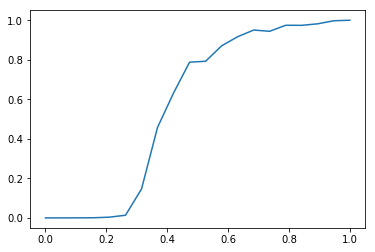

In [207]:
p1 = 0.5
n = 50
nbsimul = 100
pp2 = np.linspace(0, 1, 20)
moy = [sum(sum(simulation(n,p1,p2)[2:]) for i in range(nbsimul))/nbsimul  for p2 in pp2]
plt.plot(pp2, moy)
plt.show()

In [150]:
moy

[0.002500000000000002,
 0.003150000000000002,
 0.004350000000000003,
 0.007024999999999992,
 0.013599999999999984,
 0.03582499999999998,
 0.1369249999999999,
 0.3340000000000002,
 0.6687249999999999,
 0.6690249999999999,
 0.773125,
 0.7495250000000003,
 0.8457500000000004,
 0.8475249999999999,
 0.8710249999999996,
 0.8931999999999997,
 0.955525,
 0.9468250000000001,
 0.9462250000000005,
 0.9601]

## Q23

In [202]:
def seuil(Lp2:[float], Lxa:[float], s = 0.5)->[float]:
    """Meilleur encadrement possible de la valeur de x égale à s = 0.5
    par dichotomie à partir des listes de probabilités Lp2 et de valeurs
    atteintes Lxa"""
    debut, fin = 0, len(Lp2)
    while fin - debut > 1:
        m = (debut + fin)//2
        if Lxa[m] > s:
            fin = m
        else:
            debut = m
    return [Lxa[debut], Lxa[fin]], [Lp2[debut], Lp2[fin]]
            

Test de la fonction précédente sur un encadrement de $\sqrt{2}$ solution de $x^2=2$ dans l'intervalle $[1;2]$

In [199]:
x = np.linspace(1, 2, 1001)
y = x**2

In [200]:
seuil(x, y, 2)

([1.9993960000000004, 2.002225], [1.4140000000000001, 1.415])

## Q24

In [204]:
def init_vac(n:int, q:float)->[[int]]:
    """Immunise aléatoirement une fraction q
    d'une grille de taille n"""
    G = init(n)
    nvac = int(q * n**2)
    k = 0
    while k < nvac:
        i = rd.randrange(n)
        j = rd.randrange(n)
        if G[i][j] == 0:
            G[i][j] = 2
        k += 1
    return G

On ne peut pas supprimer le test `if G[i][j] == 0:` car on effectue des tirages avec remise parmi les $n^2$ cases et donc on peut retomber sur une case déjà immunisée

L'appel `init_vac(5, 0.2)` retourne une grille de $25$ cases avec $25 \times 0,2 = 5$ cases immunisées choisies aléatoirement.

In [205]:
init_vac(5, 0.2)

[[0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0],
 [0, 0, 1, 0, 2],
 [2, 0, 0, 0, 0],
 [0, 0, 0, 2, 2]]